# <span style=color:red> Diabetes Project Bonus Part Improved Exploratary Data Analysis Steps </span>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
df = pd.read_csv('Diabetes.csv')

In [122]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
df.shape # Dimension of the data set

(768, 9)

In [126]:
df.info() # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
df.describe() # Statistical Summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [130]:
df.isnull().sum() #number of missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Distribution of the target variable

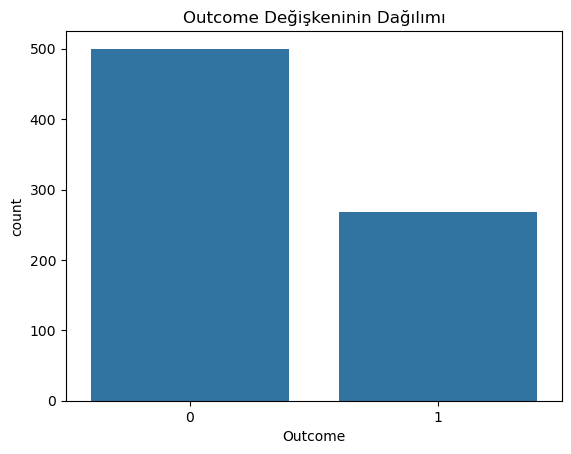

In [133]:
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Değişkeninin Dağılımı')
plt.show()


### Distribution of numerical variables

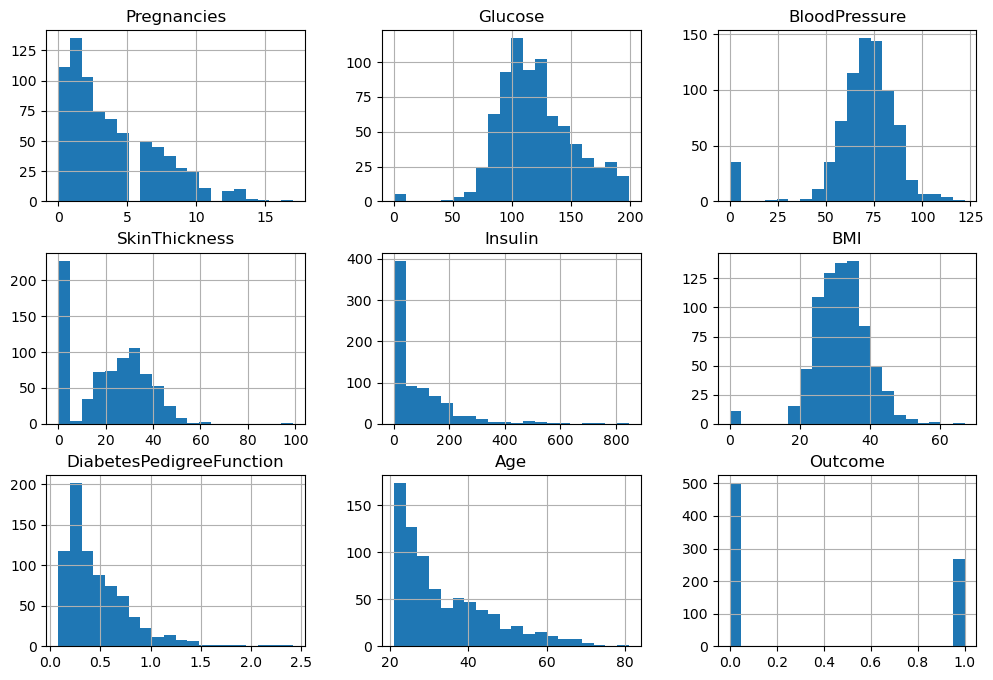

In [136]:
df.hist(bins=20, figsize=(12,8))
plt.show()

### The correlation matrix between the variables 

## Correlation

Correlation is a statistic that indicates how strongly two variables are related to each other. The correlation coefficient ranges between -1 and 1:

- A value close to 1 indicates a positive relationship (as one variable increases, the other also increases).
- A value close to -1 indicates a negative relationship (as one variable increases, the other decreases).
- A value close to 0 indicates no significant relationship between the two variables.


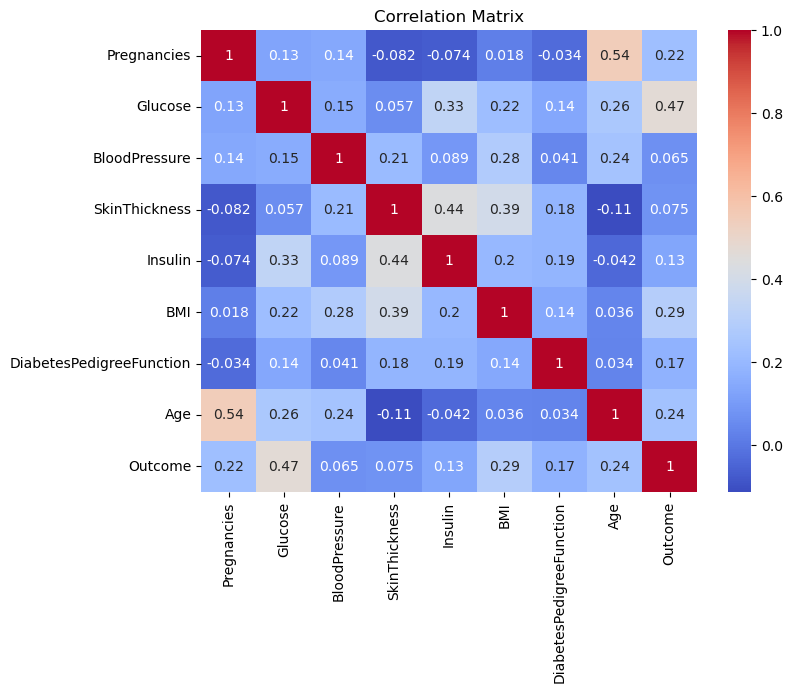

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Detecting Outliers

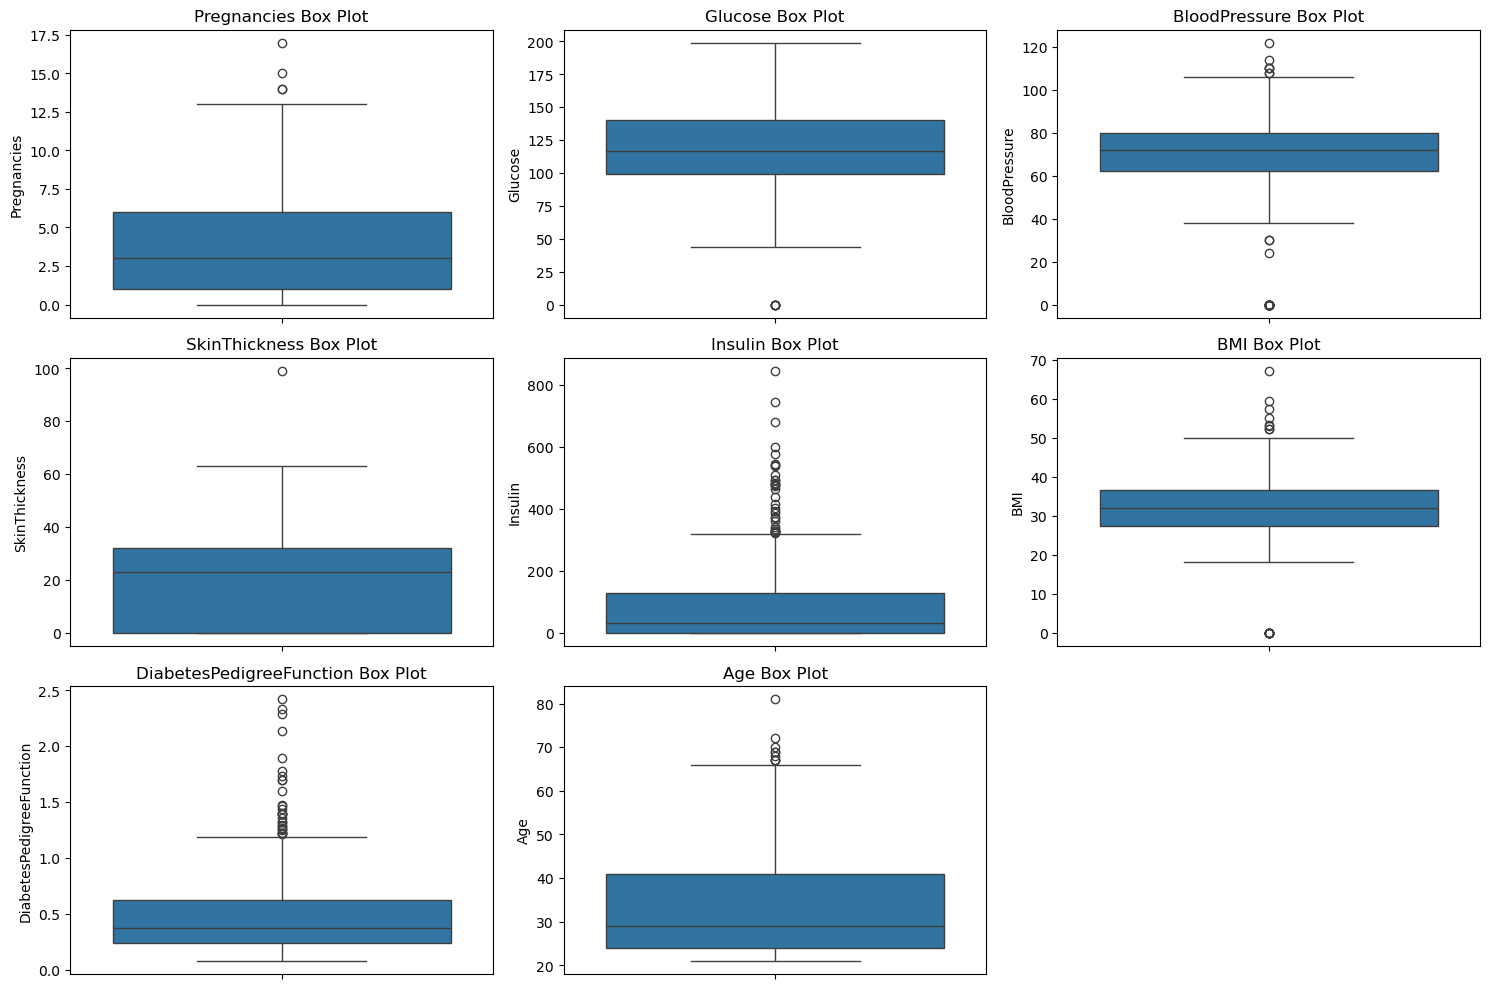

In [142]:
# Kutu grafikleri
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Box Plot')
plt.tight_layout()
plt.show()


## Finding and printing outliers numerically

In [144]:
for col in df.columns[:-1]:  # Excluding the last column assuming it's the target variable
    Q1 = df[col].quantile(0.25)  # 1st Quartile
    Q3 = df[col].quantile(0.75)  # 3rd Quartile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Finding the number of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f'Number of outliers in {col} column: {outliers.shape[0]}')
    print(outliers[col].values)  # List of outlier values


Number of outliers in Pregnancies column: 4
[15 17 14 14]
Number of outliers in Glucose column: 5
[0 0 0 0 0]
Number of outliers in BloodPressure column: 45
[  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
Number of outliers in SkinThickness column: 1
[99]
Number of outliers in Insulin column: 34
[543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]
Number of outliers in BMI column: 19
[ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]
Number of outliers in DiabetesPedigreeFunction column: 29
[2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]
Number of outliers in Age column: 9
[69 67 72 81 67 67 70

# Scaling 

## Common Scaling Methods and When to Use Them

### 1. **Min-Max Scaling**
   - **How it works**: Rescales the data to a fixed range, typically [0, 1].
   - **When to use**: Best when the data has known boundaries and you want all features on the same scale. Useful in algorithms that rely on distance measurements like **K-Nearest Neighbors (KNN)** or **K-Means Clustering**.
     

### 2. **Standard Scaling (Z-score)**
   - **How it works**: Centers the data by subtracting the mean and dividing by the standard deviation, resulting in data with a mean of 0 and standard deviation of 1.
   - **When to use**: Suitable for normally distributed data. Commonly used in algorithms like **Linear Regression** and **Support Vector Machines (SVM)**.
   
### 3. **Robust Scaling**
   - **How it works**: Uses the median and interquartile range (IQR) instead of mean and standard deviation, making it robust to outliers.
   - **When to use**: Effective when data contains many outliers. Useful for algorithms sensitive to outliers, like **Linear Regression**.
   

### 4. **MaxAbs Scaling**
   - **How it works**: Scales each feature by its maximum absolute value, keeping all values between -1 and 1.
   - **When to use**: Useful for sparse data or when maintaining sparsity is important, like in **Sparse Matrices** and **Principal Component Analysis (PCA)**.
   

### 5. **Log Transformation**
   - **How it works**: Applies the natural logarithm to compress the range of data, particularly for skewed distributions.
   - **When to use**: Effective for reducing skewness in positive data, especially for highly skewed variables. Used in **Linear Regression** or **Neural Networks** for features spanning multiple orders of magnitude.
   

#### There are outliers in this column (15, 17, 14), but the data usually consists of positive integers, and its distribution is not much affected by the extreme values.

In [149]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df['Pregnancies_scaled'] = scaler.fit_transform(df[['Pregnancies']])

#### Values of 0 in the glucose column were detected as outliers. These zeroes may be medically meaningless and can be removed. after subtracting the values of 0, the Robust Scaler can be applied.

In [152]:
df = df[df['Glucose'] != 0]  # remove the glucose values that are 0
df['Glucose_scaled'] = scaler.fit_transform(df[['Glucose']])

#### There are outliers in this column, such as values of 0 and very high blood pressure (110, 122, 114). 0 may not be a real value in medical terms, and the Robust Scaler is the most suitable option in this column.

In [157]:
df = df[df['BloodPressure'] != 0]  
df['BloodPressure_scaled'] = scaler.fit_transform(df[['BloodPressure']])


#### There is only one outlier (99) in this column. In general, the distribution can be considered normal.

In [160]:
df['SkinThickness_scaled'] = scaler.fit_transform(df[['SkinThickness']])


#### There are many high outliers in this column (for example, 846, 600, 745). Insulin levels typically deviate a lot. Therefore, log conversion is recommended.

In [163]:
import numpy as np
df['Insulin_scaled'] = np.log(df['Insulin'] + 1)  # Log transformation

#### There are also a few zeros and high outliers (such as 67.1, 59.4) in this column. Therefore, log conversion is recommended.

In [166]:
df['BMI_scaled'] = np.log(df['BMI'] + 1)  # Log dönüşümü uygulanıyor


#### There are several outliers above 1 in this column (for example, 2.42, 2.33). This data also shows a positive deviation, so the log conversion is appropriate.

In [169]:
df['DiabetesPedigreeFunction_scaled'] = np.log(df['DiabetesPedigreeFunction'] + 1)


#### There are a few outliers in the age data (for example, 81, 72). However, age data usually show a normal distribution, and extreme values should usually not be inferred. Therefore, the Robust Scaler is a good choice.

#### Even if there are extreme values in the age column, the Robust Scaler manages these values better.

In [172]:
df['Age_scaled'] = scaler.fit_transform(df[['Age']])


# Reviewing scaled data

In [175]:
df_scaled = df[['Pregnancies_scaled', 'Glucose_scaled', 'BloodPressure_scaled',
                'SkinThickness_scaled', 'Insulin_scaled', 'BMI_scaled', 
                'DiabetesPedigreeFunction_scaled', 'Age_scaled']]
print(df_scaled.head())

   Pregnancies_scaled  Glucose_scaled  BloodPressure_scaled  \
0                 0.6        0.738095                 0.000   
1                -0.4       -0.761905                -0.375   
2                 1.0        1.571429                -0.500   
3                -0.4       -0.666667                -0.375   
4                -0.6        0.476190                -2.000   

   SkinThickness_scaled  Insulin_scaled  BMI_scaled  \
0              0.333333        0.000000    3.543854   
1              0.151515        0.000000    3.317816   
2             -0.727273        0.000000    3.190476   
3             -0.030303        4.553877    3.370738   
4              0.333333        5.129899    3.786460   

   DiabetesPedigreeFunction_scaled  Age_scaled  
0                         0.486738    1.235294  
1                         0.300845    0.117647  
2                         0.514021    0.176471  
3                         0.154436   -0.470588  
4                         1.190279    0.23529

# Comparing the distribution of data before and after scaling

### Histograms:

- **Left (Before Scaling):** Insulin values are highly right-skewed with a few extreme outliers pulling the distribution to the right.
- **Right (After Log Transformation):** The log transformation reduces skewness, balances the distribution, and minimizes the effect of outliers, making the data more normally distributed.

### Box Plots:

- **Left (Before Scaling):** Several high-value outliers (above 600) distort the distribution, with small whiskers due to these extremes.
- **Right (After Log Transformation):** The outliers are compressed, the distribution becomes more uniform, and the data range is reduced, making it more symmetrical.


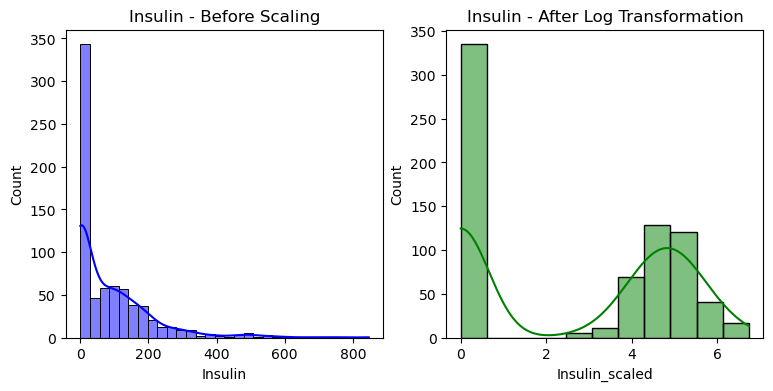

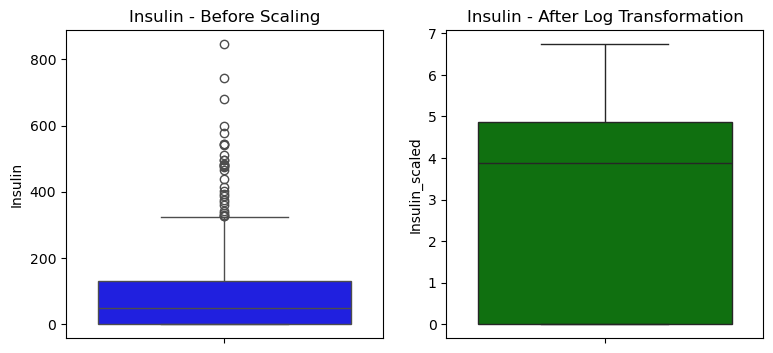

In [179]:
plt.figure(figsize=(9,4))

# Histogram before scaling
plt.subplot(1,2,1)
sns.histplot(df['Insulin'], kde=True, color='blue')
plt.title('Insulin - Before Scaling')

# Histogram after log transformation
plt.subplot(1,2,2)
sns.histplot(df['Insulin_scaled'], kde=True, color='green')
plt.title('Insulin - After Log Transformation')

plt.show()


# Box plot part
plt.figure(figsize=(9,4))

# Box plot before scaling
plt.subplot(1,2,1)
sns.boxplot(y=df['Insulin'], color='blue')
plt.title('Insulin - Before Scaling')

# Box plot after log transformation
plt.subplot(1,2,2)
sns.boxplot(y=df['Insulin_scaled'], color='green')
plt.title('Insulin - After Log Transformation')

plt.show()

### Lower MSE is better performance
###  MSE without scaling has a marginally better result in this scenario, but the difference is not drastic. This suggests that scaling or transformation does not always guarantee better performance and that the impact of scaling can vary depending on the dataset and the relationships between variables.

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df[['Insulin']], df['Outcome'], test_size=0.2, random_state=42)

# Training the model with unscaled data
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE without scaling: {mean_squared_error(y_test, y_pred)}')

# Training the model with scaled data
X_train_scaled, X_test_scaled = train_test_split(df[['Insulin_scaled']], test_size=0.2, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print(f'MSE with scaling: {mean_squared_error(y_test, y_pred_scaled)}')



MSE without scaling: 0.21882671044726384
MSE with scaling: 0.22734573298354033


### Correlation maps differences

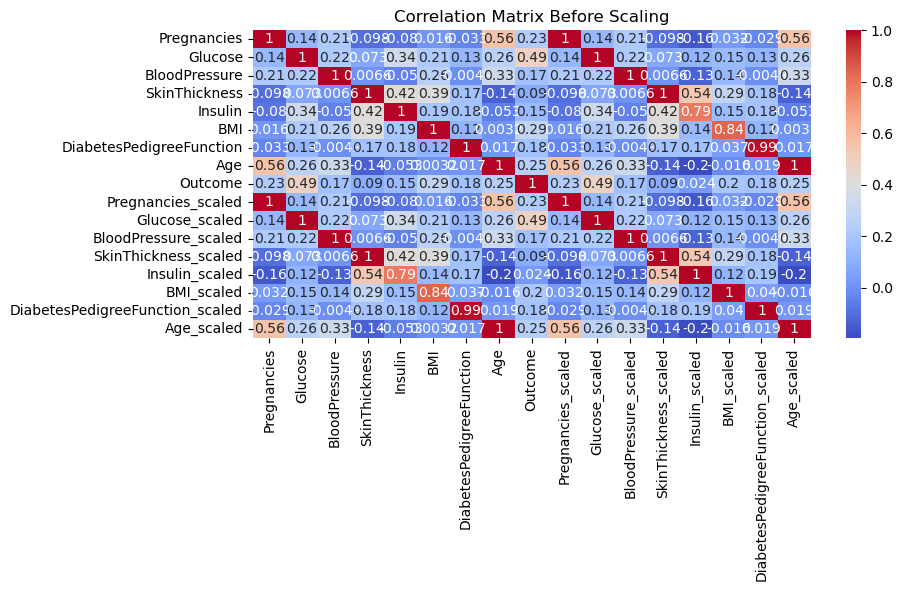

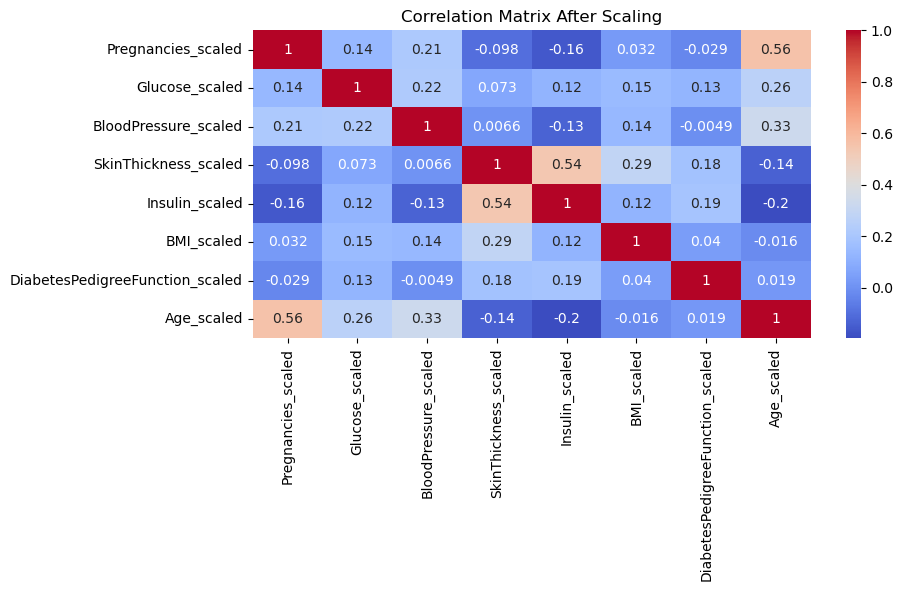

In [185]:
# Correlation matrix with unscaled data
plt.figure(figsize=(9,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Before Scaling')
plt.show()

# Correlation matrix with scaled data
plt.figure(figsize=(9,4))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Scaling')
plt.show()


### After the log transformation, a large part of the data has become more symmetrical, but it is still observed that the data does not fully conform to a normal distribution. The log transformation has reduced the impact of outliers, but it has not completely eliminated the skewness inherent in the data.

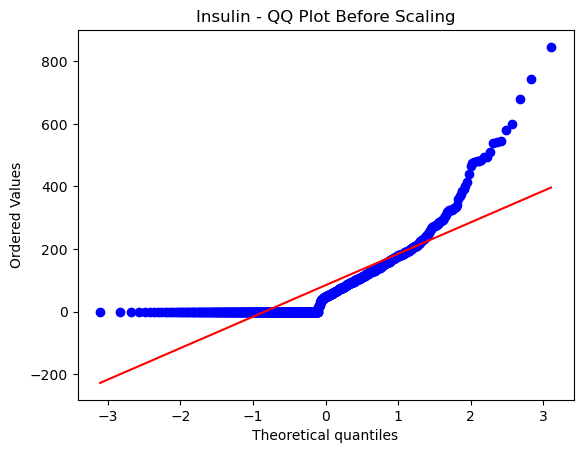

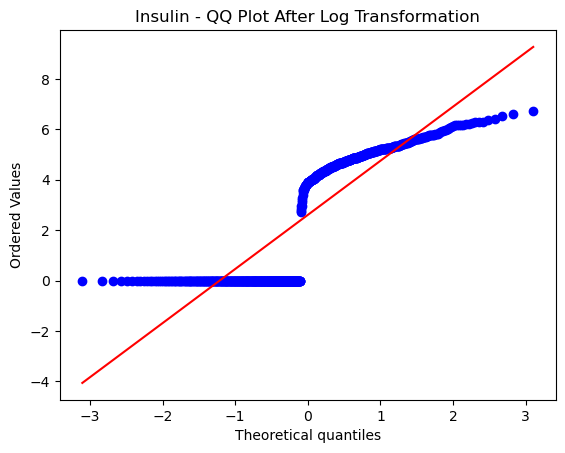

In [187]:
import scipy.stats as stats

# Before log transformation
stats.probplot(df['Insulin'], dist="norm", plot=plt)
plt.title('Insulin - QQ Plot Before Scaling')
plt.show()

# After log transformation
stats.probplot(df['Insulin_scaled'], dist="norm", plot=plt)
plt.title('Insulin - QQ Plot After Log Transformation')
plt.show()


###  You can apply chi-square test to examine whether categorical variables are independent or not.
## Results:
#### p-value: 2.773929226949712e-07 is a very small value and is about 0.000000277. This is much smaller than the generally used significance level of 0.05 (α = 0.05).

#### In this case, we can say that there is a statistically significant relationship between Pregnancies (number of pregnancies) and Outcome (diabetes status). Dec. In other words, there is a non-random relationship between the number of pregnancies and diabetes. Dec. This relationship is not due to chance, and the number of pregnancies can affect diabetes outcomes.

In [190]:
from scipy.stats import chi2_contingency
# Ki-kare test
crosstab = pd.crosstab(df['Pregnancies'], df['Outcome'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'Chi-Square Test p-value: {p}')


Chi-Square Test p-value: 2.773929226949712e-07


#### Imbalance in the Target Variable: If the target variable (for example, Outcome) classes are unstable, the imbalance of the classes can negatively affect the modeling performance. In this case, oversampling (such as SMOTE) or undersampling methods can be used.

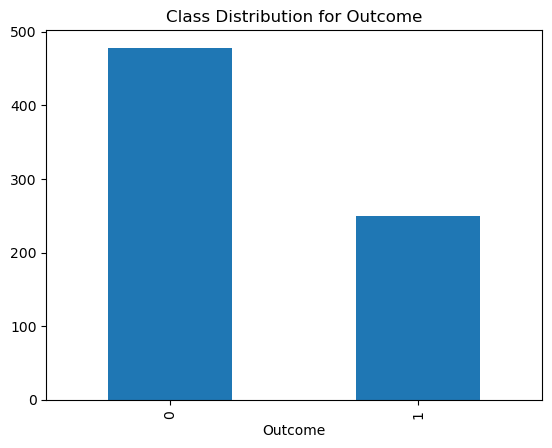

In [194]:
# Sınıf dengesizliği incelemesi
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Class Distribution for Outcome')
plt.show()


# Step-by-Step Feature Engineering:

#### Feature Engineering is a process of creating new features from the existing data to enhance the model's performance. For the Diabetes dataset, we will create a new feature called Health Risk Score using the BMI (Body Mass Index) and Age columns.

#### This Health Risk Score can represent a combined effect of BMI and Age on the likelihood of having diabetes. For example, a higher BMI and older age could indicate a higher risk of diabetes. Therefore, by combining these variables, we may improve the predictive power of the model.

## 1.)Creating the New Feature: Health Risk Score

In [199]:
df['Health_Risk_Score'] = df['BMI'] * df['Age']

# Displaying the first 5 rows of the new feature
print(df[['BMI', 'Age', 'Health_Risk_Score']].head())


    BMI  Age  Health_Risk_Score
0  33.6   50             1680.0
1  26.6   31              824.6
2  23.3   32              745.6
3  28.1   21              590.1
4  43.1   33             1422.3


## 2.) Exploring the Distribution of the New Feature
### We can visualize the distribution of the newly created Health_Risk_Score feature to understand its contribution to the dataset.

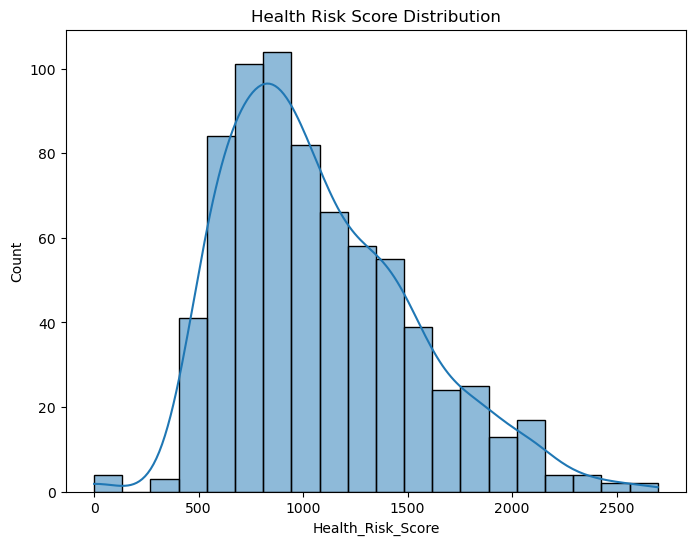

In [202]:
# Distribution of Health Risk Score
plt.figure(figsize=(8,6))
sns.histplot(df['Health_Risk_Score'], kde=True)
plt.title('Health Risk Score Distribution')
plt.show()


## 3.) Analyzing the Relationship with the Target Variable
### Let's examine the relationship between the new feature Health_Risk_Score and the target variable (Outcome) to see if the new feature can help in predicting diabetes risk.

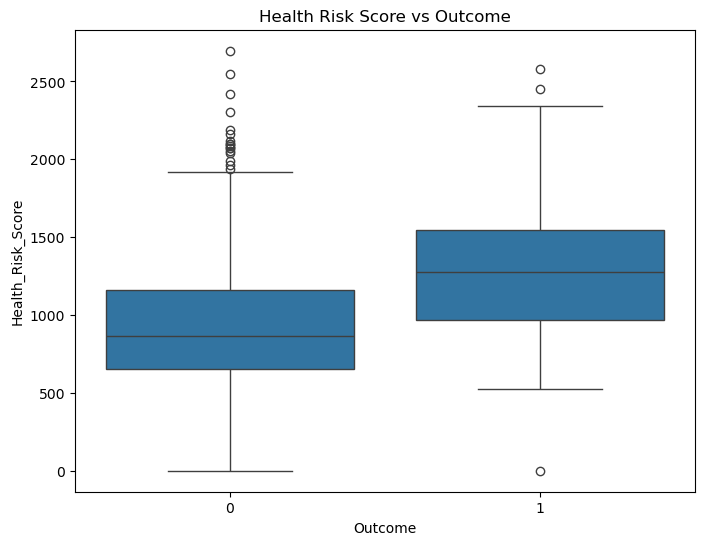

In [205]:
# Exploring the relationship between the new feature and Outcome
plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome', y='Health_Risk_Score', data=df)
plt.title('Health Risk Score vs Outcome')
plt.show()


## 4.) Using the New Feature in Model Training
### We can now include the new Health_Risk_Score in the model training process and test how it affects the model's performance.


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data with the new feature
X = df[['BMI', 'Age', 'Health_Risk_Score']]  # Including the new feature
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Health Risk Score: {accuracy}')


Accuracy with Health Risk Score: 0.6232876712328768


## Feature Importance Analysis and Advanced Techniques

### 1. Data Preparation
#### Before proceeding with feature importance analysis, we first need to prepare the dataset. Specifically, categorical variables such as `AgeGroup` and `BMI_Category` need to be converted to numerical values using **one-hot encoding**. We will also split the dataset into training and testing sets for model evaluation.

In [212]:
# Converting categorical features to dummy variables
df_encoded = pd.get_dummies(df, columns=['Age', 'BMI'], drop_first=True)

# Separating features (X) and target (y)
X = df_encoded.drop(columns=['Outcome'])  # Features
y = df_encoded['Outcome']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 2. Training the Random Forest Model
#### We will use **Random Forest Classifier** to train our model and extract the feature importance from it. Random Forest is an ensemble method that can naturally provide the importance of features as part of the model.


In [215]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
importances = rf_model.feature_importances_
features = X.columns

### 3. Visualizing Feature Importance
#### Once we extract the feature importances, we will sort and visualize them using a bar plot. This will allow us to see which features are most important in predicting diabetes.

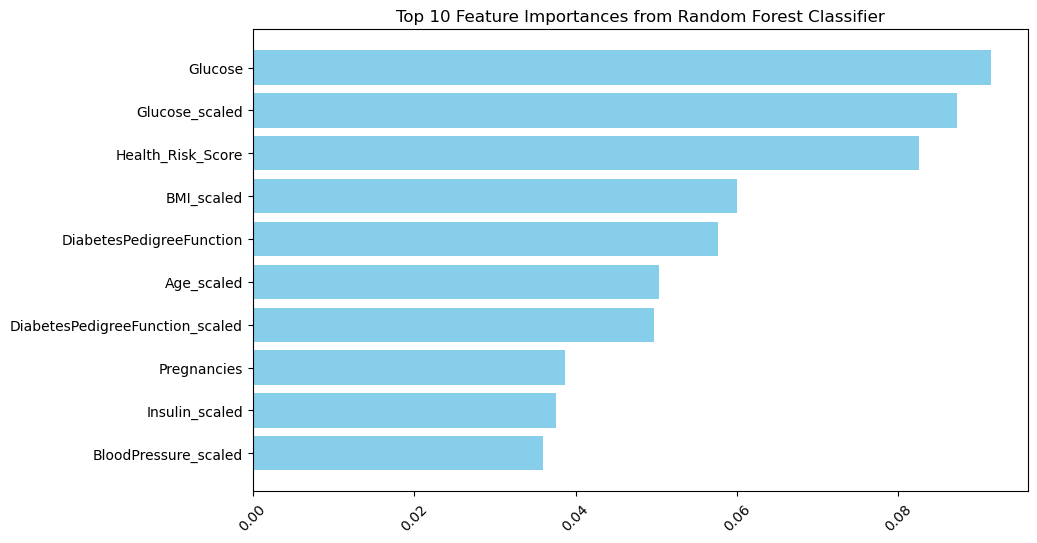

In [218]:
top_features = feature_importance_df.head(10)


plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances from Random Forest Classifier')
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # reverse for important feature
plt.xticks(rotation=45)    # X axis
plt.show()

### 4. Interpreting Results
The top features identified by the Random Forest Classifier include `Glucose`, `BMI`, `Age`, and `DiabetesPedigreeFunction`. These features play a critical role in predicting whether a person has diabetes. For example:
- **Glucose**: High glucose levels are strongly associated with diabetes risk.
- **BMI**: Higher BMI values (overweight and obesity) increase the likelihood of diabetes.
- **Age**: Older individuals are generally at higher risk for developing diabetes.
- **DiabetesPedigreeFunction**: A higher value indicates a stronger family history of diabetes, which is a significant risk factor.

By focusing on these key variables, we can enhance prediction accuracy and provide meaningful insights for health interventions.